Ejercicio 1

Para funciones cuadráticas $f(x) = \frac{1}{2}x^TAx$ con matrices $A \in \mathbb{R}^{10×10}$ definidas positivas y diagonales,
elaborar una serie de tests tales que muestren las dificultades del Método del Gradiente con longitud de paso óptima a medida que aumenta el orden de diferencia entre el menor y el mayor autovalor. Sea $t^*_k$ la longitud del paso óptimo en la k-ésima iteración, comparar en cada caso con los resultados obtenidos
tomando:
- $\frac{3}{4}t^*_k$
- $\frac{1}{2}t^*_k$
- $\frac{1}{4}t^*_k$
- $\gamma _k t^*_k$ con $\gamma_k$ un numero aleatorio en (0,1].


In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
def f(x,A):
    return 0.5*np.dot(x.T,A@x)

In [34]:
def metodo_gradiente_paso_optimo(A,x0,max_iter=1000):
    k=0
    x_k=x0
    d=-A@x0
    y=[]
    while(k<max_iter and np.linalg.norm(d)>10**-8):
        t_optimo=np.dot(d.T,d)/np.dot(d.T,A@d)
        x_k=x_k+t_optimo*d
        d=-A@x_k
        y.append(f(x_k,A))
        k+=1
    return y

def metodo_gradiente_no_optimo(A,x0,alpha,max_iter=1000):
    k=0
    x_k=x0
    d=-A@x0
    y=[]
    while(k<max_iter and np.linalg.norm(d)>10**-8):
        t=alpha*(np.dot(d.T,d)/np.dot(d.T,A@d))
        x_k=x_k+t*d
        d=-A@x_k
        y.append(f(x_k,A))
        k+=1
    return y

Primero vemos como varia la convergencia del metodo al aumentar la diferencia entre los autovalores de la matriz $A$.

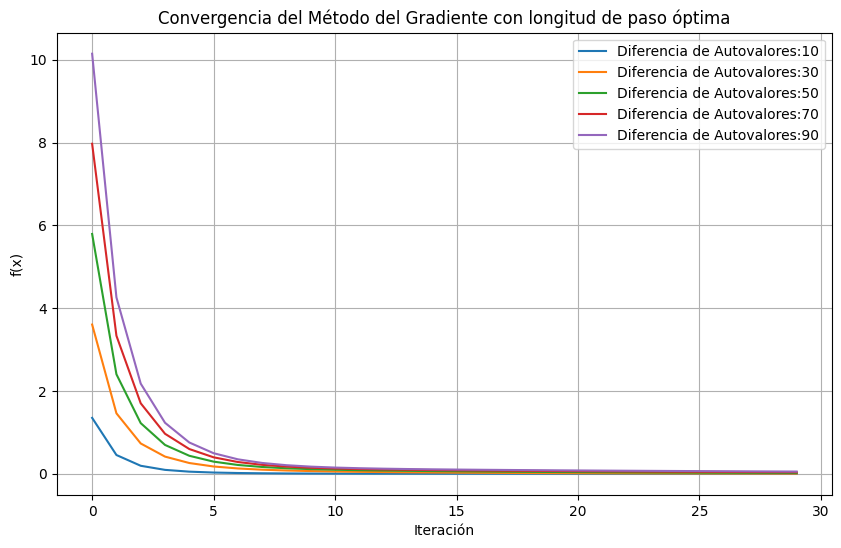

In [35]:
ratios=np.arange(10,100,20)
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
for ratio in ratios:
    autovalores=np.linspace(1,ratio,10)
    A=np.diag(autovalores)
    y=metodo_gradiente_paso_optimo(A,x0,max_iter=30)
    plt.plot(y,label=f"Diferencia de Autovalores:{ratio}")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.title("Convergencia del Método del Gradiente con longitud de paso óptima")
plt.grid()
plt.show()


Ahora veamos que pasa al tomar otro paso $t_k$.

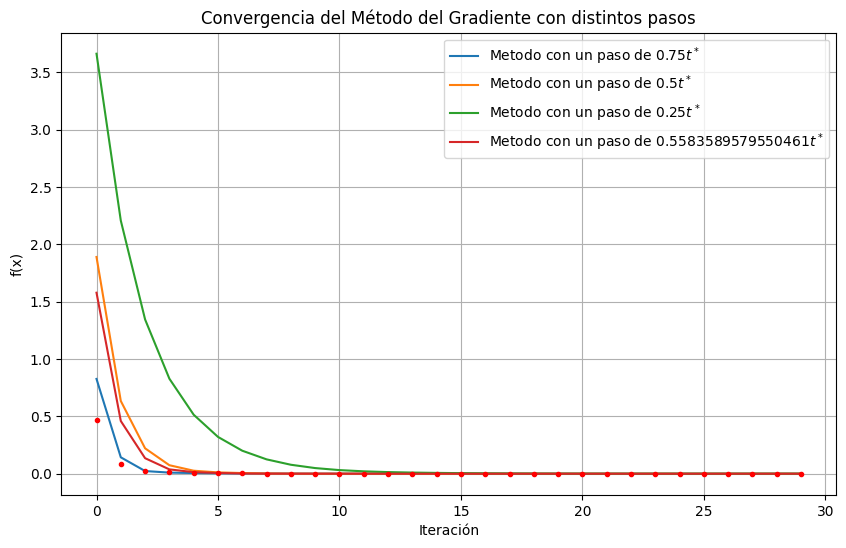

In [36]:
alphas=[3/4,1/2,1/4,np.random.rand()]
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
for alpha in alphas:
    autovalores=np.linspace(1,10,10)
    A=np.diag(autovalores)
    y_optimo=metodo_gradiente_paso_optimo(A,x0,max_iter=30)
    y_no_optimo=metodo_gradiente_no_optimo(A,x0,alpha=alpha,max_iter=30)
    plt.plot(y_no_optimo,label=f"Metodo con un paso de {alpha}$t^*$")
plt.plot(y_optimo,".",color="red")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.title("Convergencia del Método del Gradiente con distintos pasos")
plt.grid()
plt.show()


Ejercicio 2.
1. Para funciones cuadráticas $f(x) = \frac{1}{2}x^TAx$ con matrices $A \in \mathbb{R}^{n×n}$ definidas positivas y diagonales, elaborar una serie de tests para corroborar la terminación en tantos pasos como autovalores distintos de A del Gradiente Conjugado.

2. Sea $t^*_k$ la longitud del paso óptimo en la k-ésima iteración y sea $β_k$ el coeficiente de corrección, experimentar qué sucede si en vez de utilizar ($t^*_k$, $β_k$) se utiliza:
- $(0.9t^*_k, β_k)$
- $(0.99t^*_k, β_k)$
- $(t^*_k, 0.9β_k)$
- $(t^*_k, 0.99β_k)$
- $(0.9t^*_k, 0.9β_k)$
- $(0.99t^*_k, 0.99β_k)$

Comentar cómo el desempeño de Gradientes Conjugados depende de la exactitud de la búsqueda lineal.

3. Comparar el desempeño de Gradiente Conjugado con el Método del Gradiente para funciones cuadráticas con matrices muy mal condicionadas (es decir, que $\frac{λ_{máx}}{λ_{min}}$ sea muy grande).

Vamos a elaborar tests con las siguientes matrices.

In [37]:
A1 = np.diag(np.random.randint(1, 30, 100))

A2 = np.diag(np.random.randint(1, 4, 10))

A3 = np.array([[1, 0], [0, 0.8]])

A4 = np.array([[1, 0, 0, 0, 0],
               [0, 8, 0, 0 ,0],
               [0, 0, 3, 0, 0],
               [0, 0, 0, 4, 0],
               [0, 0, 0, 0, 17]])

A5 = np.array([[163,   0,   0,   0,   0,   0],
               [  0, 163,   0,   0,   0,   0],
               [  0,   0, 181,   0,   0,   0],
               [  0,   0,   0,   1,   0,   0],
               [  0,   0,   0,   0,   1,   0],
               [  0,   0,   0,   0,   0,   1]])

Calculamos los autovalores de las matrices, y escribimos el Método del Gradiente Conjugado.

In [42]:
autovalores_A1 = np.linalg.eigvals(A1)
autovalores_A2 = np.linalg.eigvals(A2)
autovalores_A3 = np.linalg.eigvals(A3)
autovalores_A4 = np.linalg.eigvals(A4)
autovalores_A5 = np.linalg.eigvals(A5)

def gradiente_conjugado(A, b, x0, eps=1e-8, k_max=1000):
  k = 0
  x_k = np.array(x0)
  d_k = -(A @ x0 + b)
  while np.linalg.norm(A @ x_k + b) > eps and k < k_max:
    t_k = - (d_k.T @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    x_k = x_k + t_k * d_k
    beta_k = (d_k.T @ A @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    d_k = -(A @ x_k + b) + beta_k * d_k
    k += 1
  return x_k, k

Evaluamos este método con las matrices dadas.

In [40]:
#A1
n_1 = A1[0].shape
b_1 = np.zeros(n_1)
x0_1 = np.ones(n_1)
cant_autovalores_A1 = len(np.unique(autovalores_A1))
min_A1, iter_A1 = gradiente_conjugado(A1, b_1, x0_1)
print(f"Con gradiente conjugado A1 realiza {iter_A1} iteraciones, teniendo {cant_autovalores_A1} autovalores.")

#A2
n_2 = A2[0].shape
b_2 = np.zeros(n_2)
x0_2 = np.ones(n_2)
cant_autovalores_A2 = len(np.unique(autovalores_A2))
min_A2, iter_A2 = gradiente_conjugado(A2, b_2, x0_2)
print(f"\nCon gradiente conjugado A2 realiza {iter_A2} iteraciones, teniendo {cant_autovalores_A2} autovalores.")

#A3
n_3 = A3[0].shape
b_3 = np.zeros(n_3)
x0_3 = np.ones(n_3)
cant_autovalores_A3 = len(np.unique(autovalores_A3))
min_A3, iter_A3 = gradiente_conjugado(A3, b_3, x0_3)
print(f"\nCon gradiente conjugado A3 realiza {iter_A3} iteraciones, teniendo {cant_autovalores_A3} autovalores.")

#A4
n_4 = A4[0].shape
b_4 = np.zeros(n_4)
x0_4 = np.ones(n_4)
cant_autovalores_A4 = len(np.unique(autovalores_A4))
min_A4, iter_A4 = gradiente_conjugado(A4, b_4, x0_4)
print(f"\nCon gradiente conjugado A4 realiza {iter_A4} iteraciones, teniendo {cant_autovalores_A4} autovalores.")

#A5
n_5 = A5[0].shape
b_5 = np.zeros(n_5)
x0_5 = np.ones(n_5)
cant_autovalores_A5 = len(np.unique(autovalores_A5))
min_A5, iter_A5 = gradiente_conjugado(A5, b_5, x0_5)
print(f"Con gradiente conjugado A5 realiza {iter_A5} iteraciones, teniendo {cant_autovalores_A5} autovalores.")

Con gradiente conjugado A1 realiza 29 iteraciones, teniendo 29 autovalores.

Con gradiente conjugado A2 realiza 3 iteraciones, teniendo 3 autovalores.

Con gradiente conjugado A3 realiza 2 iteraciones, teniendo 2 autovalores.

Con gradiente conjugado A4 realiza 5 iteraciones, teniendo 5 autovalores.
Con gradiente conjugado A5 realiza 3 iteraciones, teniendo 3 autovalores.


Corroboramos que efectivamente el método termina en tantos pasos como autovalores distintos tiene cada matriz.

Experimentamos qué sucede si en vez de usar ( $t^*_k$ ,  $β_k$ ) utilizamos (0.9$t^*_k$, $β_k$).

In [45]:
def gradiente_conjugado_i(A, b, x0, eps=1e-8, k_max=1000):
  k = 0
  x_k = np.array(x0)
  d_k = -(A @ x0 + b)
  while np.linalg.norm(A @ x_k + b) > eps and k < k_max:
    t_k = 0.9 * (- (d_k.T @ (A @ x_k + b)) / (d_k.T @ (A @ d_k)))
    x_k = x_k + t_k * d_k
    beta_k = (d_k.T @ A @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    d_k = -(A @ x_k + b) + beta_k * d_k
    k += 1
  return x_k, k

#A1
min_A1_i, iter_A1_i = gradiente_conjugado_i(A1, b_1, x0_1)
print(f"Con gradiente conjugado A1 realiza {iter_A1_i} iteraciones, teniendo {cant_autovalores_A1} autovalores.")

#A2
min_A2_i, iter_A2_i = gradiente_conjugado_i(A2, b_2, x0_2)
print(f"\nCon gradiente conjugado A2 realiza {iter_A2_i} iteraciones, teniendo {cant_autovalores_A2} autovalores.")

#A3
min_A3_i, iter_A3_i = gradiente_conjugado_i(A3, b_3, x0_3)
print(f"\nCon gradiente conjugado A3 realiza {iter_A3_i} iteraciones, teniendo {cant_autovalores_A3} autovalores.")

#A4
min_A4_i, iter_A4_i = gradiente_conjugado_i(A4, b_4, x0_4)
print(f"\nCon gradiente conjugado A4 realiza {iter_A4_i} iteraciones, teniendo {cant_autovalores_A4} autovalores.")

#A5
min_A5_i, iter_A5_i = gradiente_conjugado_i(A5, b_5, x0_5)
print(f"Con gradiente conjugado A5 realiza {iter_A5_i} iteraciones, teniendo {cant_autovalores_A5} autovalores.")

Con gradiente conjugado A1 realiza 50 iteraciones, teniendo 29 autovalores.

Con gradiente conjugado A2 realiza 19 iteraciones, teniendo 3 autovalores.

Con gradiente conjugado A3 realiza 17 iteraciones, teniendo 2 autovalores.

Con gradiente conjugado A4 realiza 32 iteraciones, teniendo 5 autovalores.
Con gradiente conjugado A5 realiza 109 iteraciones, teniendo 3 autovalores.


Observamos que utilizando (0.9$t^*_k$, $β_k$), el Método del Gradiente Conjugado empeora su desempeño. Esto es debido a que perturbamos un poco la longitud del paso óptimo en cada iteración, y esto lleva a que el método realice una mayor cantidad de iteraciones para alcanzar el mínimo. Por lo que está convergiendo, pero lo hace más lentamente que con la longitud del paso óptimo.